# Argumentationsstruktur

In [1]:
from graphviz import Digraph # für die Erstellung von Graphen
from IPython.display import Image # für die Anzeige von Bildern

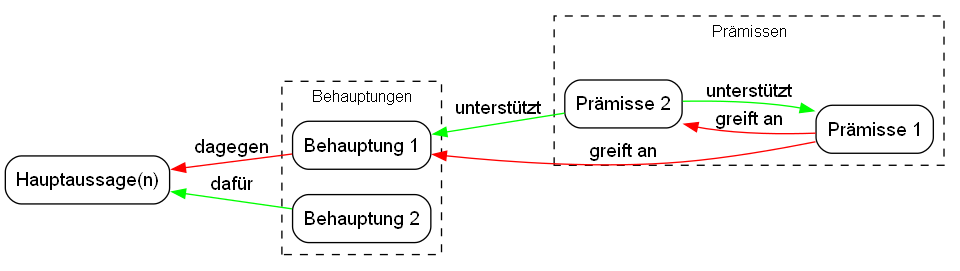

In [4]:
dot = Digraph()
# Größe und Schriftart sowie Ausrichtung
dot.attr(size='10,10!', fontsize='12', fontname='Arial', rankdir='RL')
# Schriftart für Kanten und Knoten
dot.attr('node', fontname='Arial')
dot.attr('edge', fontname='Arial')

# Hauptaussage 
dot.node('Hauptaussage', 'Hauptaussage(n)', shape='record', style='rounded')

# Untergraphen Behauptungen und Prämissen
with dot.subgraph(name='cluster_claims') as c:
    c.attr(style='dashed')
    c.node('Behauptung 1', 'Behauptung 1', shape='record', style='rounded')
    c.node('Behauptung 2', 'Behauptung 2', shape='record', style='rounded')
    c.attr(label='Behauptungen')

with dot.subgraph(name='cluster_premises') as c:
    c.attr(style='dashed')
    c.node('Prämisse 1', 'Prämisse 1', shape='record', style='rounded')
    c.node('Prämisse 2', 'Prämisse 2', shape='record', style='rounded')
    c.attr(label='Prämissen')

# Kanten
dot.edge('Behauptung 1', 'Hauptaussage', color='red', label='dagegen')
dot.edge('Behauptung 2', 'Hauptaussage', color='green', label='dafür')
dot.edge('Prämisse 1', 'Behauptung 1', color='red', label='greift an')
dot.edge('Prämisse 2', 'Behauptung 1', color='green', label='unterstützt')
dot.edge('Prämisse 1', 'Prämisse 2', color='red', label='greift an')
dot.edge('Prämisse 2', 'Prämisse 1', color='green', label='unterstützt')

# Ausgabe des Graphen als .png-Datei
dot.format = 'png'
dot.render('Argumentationsstruktur')
Image('Argumentationsstruktur.png')

# Prozessschema

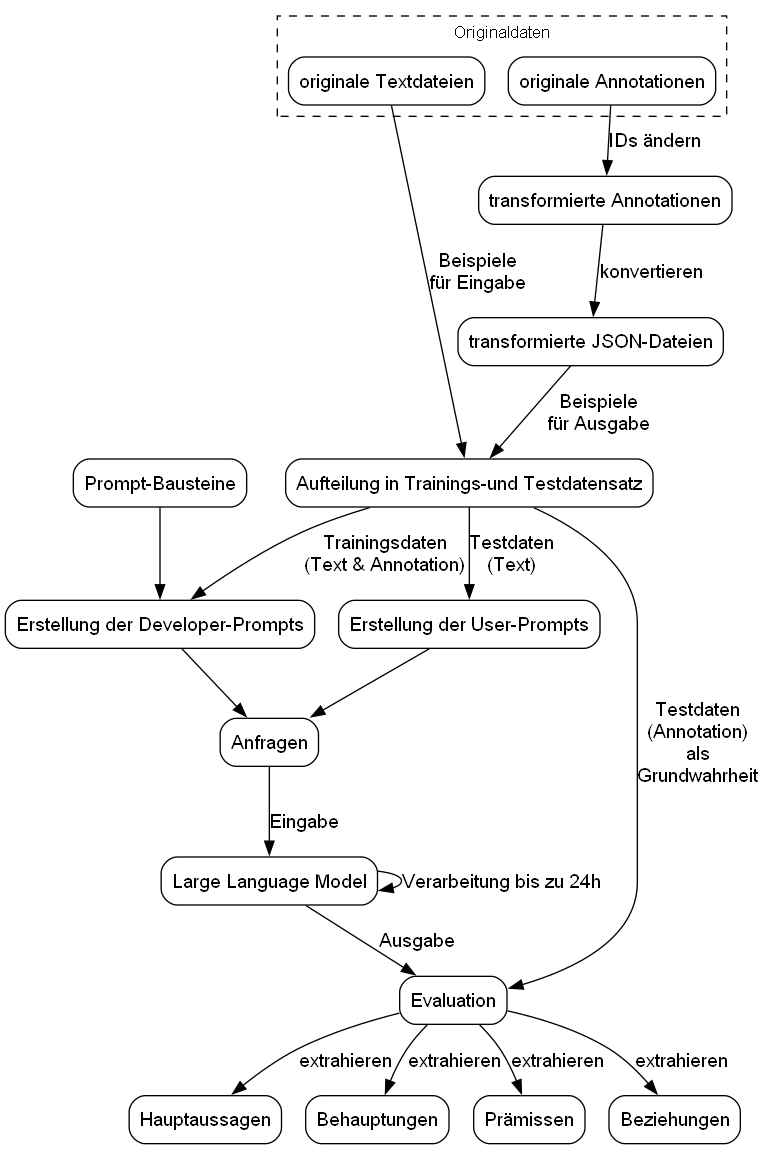

In [3]:
llm = Digraph()

# Formatierung von Schriftart und -größe, sowie Ausrichtung
llm.attr(rankdir='TB', fontname='Arial', fontsize='13')
llm.attr('node', fontname='Arial')
llm.attr('edge', fontname='Arial')

# Untergraph für Originaldaten
with llm.subgraph(name='cluster_orig_data') as c:
    c.attr(style='dashed')
    c.node('orig_data_txt', 'originale Textdateien', shape='record', style='rounded')
    c.node('orig_data_ann', 'originale Annotationen', shape='record', style='rounded')
    c.attr(label='Originaldaten')

# Nodes / Knoten 
llm.node('transformed_data_ann', 'transformierte Annotationen', shape='record', style='rounded')
llm.node('transformed_data_JSON', 'transformierte JSON-Dateien', shape='record', style='rounded')
llm.node('developer', 'Erstellung der Developer-Prompts', shape='record', style='rounded')
llm.node('user', 'Erstellung der User-Prompts', shape='record', style='rounded')
llm.node('prompts', 'Anfragen', shape='record', style='rounded')
llm.node('LLM', 'Large Language Model', shape='record', style='rounded')
llm.node('Evaluation', 'Evaluation', shape='record', style='rounded')
llm.node('split', 'Aufteilung in Trainings-und Testdatensatz ', shape='record', style='rounded')
llm.node('blocks', 'Prompt-Bausteine', shape='record', style='rounded')
llm.node('mc', 'Hauptaussagen', shape='record', style='rounded')
llm.node('c', 'Behauptungen', shape='record', style='rounded')
llm.node('p', 'Prämissen', shape='record', style='rounded')
llm.node('r', 'Beziehungen', shape='record', style='rounded')

# Edges / Kanten 
line_color = 'black'
llm.edge('orig_data_ann', 'transformed_data_ann', color=line_color, label='IDs ändern')
llm.edge('transformed_data_ann', 'transformed_data_JSON', color=line_color, label='konvertieren')
llm.edge('transformed_data_JSON', 'split', color=line_color, label='Beispiele\nfür Ausgabe')
llm.edge('developer', 'prompts', color=line_color)
llm.edge('user', 'prompts', color=line_color)
llm.edge('prompts', 'LLM', color=line_color, label='Eingabe')
llm.edge('LLM', 'Evaluation', color=line_color, label='Ausgabe')
llm.edge('orig_data_txt', 'split', color=line_color, label='Beispiele\nfür Eingabe')
llm.edge('split', 'developer', color=line_color, label='Trainingsdaten\n(Text & Annotation)')
llm.edge('split', 'user', color=line_color, label='Testdaten\n(Text)')
llm.edge('split', 'Evaluation', color=line_color, label='Testdaten\n(Annotation)\nals\nGrundwahrheit')
llm.edge('LLM', 'LLM', color=line_color, label='Verarbeitung bis zu 24h')
llm.edge('Evaluation', 'mc', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'c', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'p', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'r', color=line_color, label='extrahieren')
llm.edge('blocks', 'developer', color=line_color)

# Ausgabe des Graphen als .png-Datei
llm.format = 'png'
llm.render('Prozess')
Image('Prozess.png')
